<a href="https://colab.research.google.com/github/ManivelSethu/EIP4/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


Text(0.5, 1.0, '3')

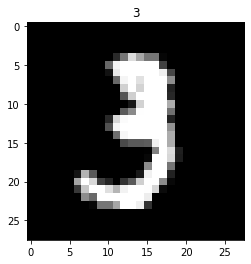

In [90]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10],cmap="gray");plt.title(y_train[10])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [92]:
print (X_train.shape)
print (X_train.dtype)

(60000, 28, 28, 1)
uint8


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [94]:
y_train[:10]
#print (y_train.dtype)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [95]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)

(60000, 10)


In [96]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [112]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 5, 5, activation='relu'))
model.add(Convolution2D(32, 7, 7, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu")`
  import sys


In [113]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 32)        50208     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 10)          330       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 1, 1, 10)          6410      
_________________________________________________________________
flatten_12 (Flatten)         (None, 10)              

In [66]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        50208     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 10)          330       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 1, 1, 10)          6410      
_________________________________________________________________
flatten_7 (Flatten)          (None, 10)              

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [115]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.1354 - acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0479 - acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0370 - acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0288 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0240 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0195 - acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0165 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0135 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.0122 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 21s 350us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [117]:
print(score)

[0.03442445185181559, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [119]:
print(y_pred[:9])
print(y_test[:9])

[[3.83098338e-13 8.31829037e-17 3.63909250e-12 1.09539300e-09
  1.12234874e-18 3.48839435e-18 1.17057679e-24 1.00000000e+00
  2.74291354e-17 3.79007624e-11]
 [1.91468355e-13 8.00534227e-14 1.00000000e+00 8.70945376e-16
  4.17213390e-17 8.75154794e-24 2.07097641e-14 1.72182856e-18
  1.81970457e-16 2.95357843e-26]
 [3.70032663e-17 1.00000000e+00 4.83888428e-13 8.08824816e-15
  1.33744837e-08 3.11458415e-10 2.34001830e-15 4.32589031e-09
  6.68734339e-12 4.19573203e-13]
 [9.99997497e-01 1.25827144e-20 7.50672996e-11 9.01976502e-15
  8.03120015e-10 1.49942003e-11 2.53193480e-06 3.33290895e-11
  2.21847846e-10 6.58143318e-10]
 [1.75342840e-15 7.71099222e-14 1.69494359e-14 5.19136581e-20
  1.00000000e+00 9.03377599e-21 6.09523350e-14 6.85215665e-13
  2.72306136e-11 8.78749677e-12]
 [2.39110913e-14 9.99999285e-01 5.01107923e-12 2.08248166e-14
  7.62808199e-08 4.38814046e-12 2.23786465e-15 6.69899237e-07
  1.31411843e-11 9.89747451e-11]
 [1.55691729e-21 4.69671628e-11 5.66097868e-15 1.21720702e

In [120]:
layer_dict = dict([(layer.name, layer) for layer in model.layers]) 
layer_dict
#layer_dict['activation_4'].output

{'activation_12': <keras.layers.core.Activation at 0x7fdb79687630>,
 'conv2d_68': <keras.layers.convolutional.Conv2D at 0x7fdb796dc828>,
 'conv2d_69': <keras.layers.convolutional.Conv2D at 0x7fdb796dc208>,
 'conv2d_70': <keras.layers.convolutional.Conv2D at 0x7fdb796dcf28>,
 'conv2d_71': <keras.layers.convolutional.Conv2D at 0x7fdb796df9b0>,
 'conv2d_72': <keras.layers.convolutional.Conv2D at 0x7fdb79672ba8>,
 'flatten_12': <keras.layers.core.Flatten at 0x7fdb7967acf8>,
 'max_pooling2d_7': <keras.layers.pooling.MaxPooling2D at 0x7fdb79668668>}

hello
32


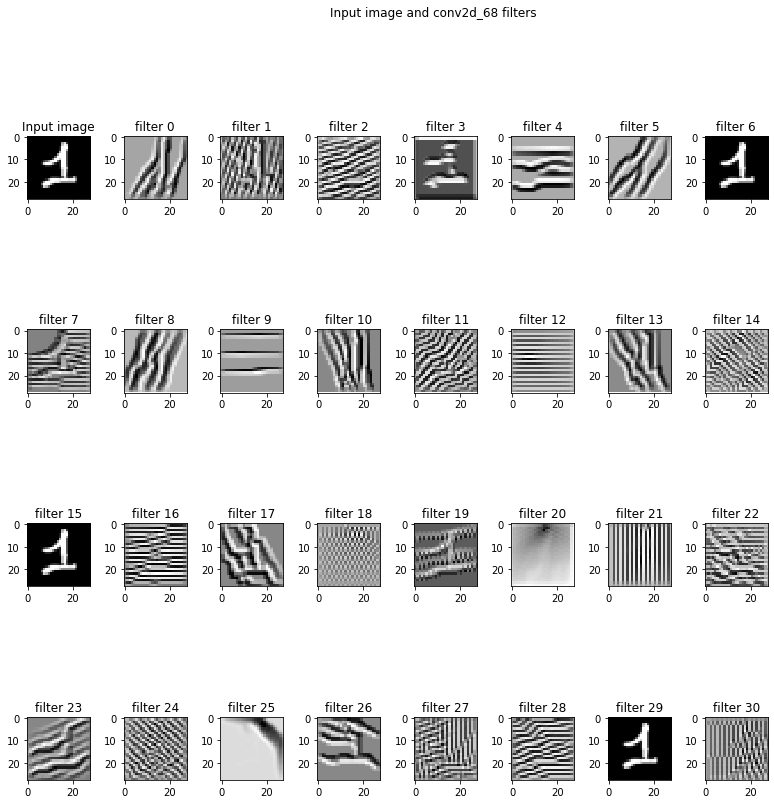

In [121]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[24]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_68'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
    print("hello")
    print(layer_output.shape[3])

    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()